In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [80]:
df = pd.read_csv('Desktop\cardio_train.csv\cardio_train.csv', sep=";")   #using a semicolon as a separator
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [81]:
df.info    #to a get an idea of how my data look like

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [82]:
height = df['height']/100     #converting height in centimeter to meter
df['overweight'] = (df['weight'] / height**2)    #creating another column called overweight
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [83]:
m = [0,25,300]       #converting 
labels = [0, 1]

df.overweight = pd.cut(df.overweight, bins= m, labels=labels)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [84]:
c = [0,1,3]        #using cut function to replace values to zero and one (bad and good cholesterol)
labels = [0, 1]

df.cholesterol = pd.cut(df.cholesterol, bins= c, labels=labels)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,2,0,0,0,1,1


In [85]:
g = [0,1,3]               ##using cut function to replace values to zero and one (bad and good cholesterol
labels = [0, 1]

df.gluc = pd.cut(df.gluc, bins= g, labels=labels)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [86]:
# using groupby function to group the desired variables and rename them into a single variable called "total"
df_sns = df.groupby(["cardio", "cholesterol", "gluc", "alco", "smoke", "active"]).size().rename("total").reset_index().melt(['total', 'cardio'])
df_sns.head(20)              
#resetted the index to a new index and further use melt function to create a value column      


,total,cardio,variable,value
0,4550,0,cholesterol,0
1,19867,0,cholesterol,0
2,245,0,cholesterol,0
3,1455,0,cholesterol,0
4,94,0,cholesterol,0
5,507,0,cholesterol,0
6,93,0,cholesterol,0
7,693,0,cholesterol,0
8,305,0,cholesterol,0
9,1263,0,cholesterol,0


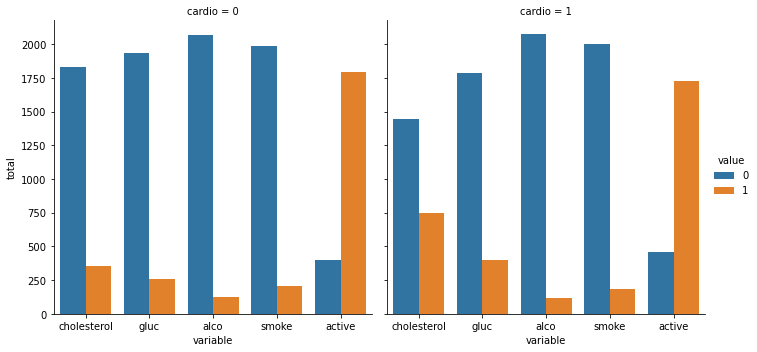

In [87]:
#using seaborn catplot to give a pictorial diagram of "total" against "cardio" 
sns.catplot(data = df_sns, x='variable', y='total', hue='value', col='cardio', kind="bar", ci = None)

In [90]:
# creating a condition to filter ap_hi and ap_lo to remove outliers
df1 = df[df.ap_hi >= 110]
df2 = df1[df1.ap_hi <= 250]
df2.ap_hi.sort_values().unique()

df3 = df2[df2.ap_lo >= 70]
df4 = df3[df3.ap_lo <= 110]
(df4['ap_lo'] <= df4['ap_hi']).value_counts()


True    63360
dtype: int64

In [91]:
#descriptive statistic of the dataset
df4.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio
count,63360.000000,63360.000000,63360.000000,63360.000000,63360.000000,63360.000000,63360.000000,63360.000000,63360.000000,63360.000000,63360.000000
mean,49956.426847,19542.869697,1.357244,164.525773,74.638608,128.366162,82.440025,0.088163,0.053472,0.803646,0.515199
std,28859.005170,2445.963888,0.479191,8.150243,14.242328,15.129547,7.977175,0.283534,0.224975,0.397243,0.499773
min,0.000000,10859.000000,1.000000,55.000000,11.000000,110.000000,70.000000,0.000000,0.000000,0.000000,0.000000
25%,24917.750000,18019.000000,1.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
50%,49977.500000,19746.000000,1.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,1.000000
75%,74878.250000,21393.000000,2.000000,170.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,240.000000,110.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
#creating a condition to filter "height" to my desired values
df5 = df4[df4.height >= 150]
df5.height.unique()
(df5['height'] >= df4.height.quantile(0.025)).value_counts()




True    62018
Name: height, dtype: int64

In [104]:
#creating a condition to filter "height" to my desired values
df6 = df5[df5.height > 180]
df6.height.unique()
(df6['height'] > df4.height.quantile(0.975)).value_counts()


True    1320
Name: height, dtype: int64

In [105]:
#creating a condition to filter "weight" to my desired values
df7 = df6[df6.weight < 52]
df7.weight.unique()
(df7['weight'] < df4.weight.quantile(0.025)).value_counts()


True    2
Name: weight, dtype: int64

In [109]:
#creating a condition to filter "weight" to my desired values
df8 = df7[df7.weight > 108]
df8.weight.unique()
(df8['weight'] > df4.weight.quantile(0.975)).value_counts()


Series([], Name: weight, dtype: int64)

<AxesSubplot:>

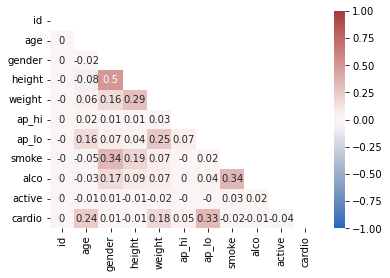

In [144]:
mat = df4.corr().round(2)  #creating a correlation matrix
mask = np.triu(np.ones_like(mat, dtype=bool))  #masking my matrix to remove upper triangle
sns.heatmap(mat, vmin= -1, vmax= 1, annot= True, center= 0, cmap= 'vlag', mask=mask)